In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('user_knowledge.csv' , sep= ';')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0,0,0,0,0,very_low
1,"0,08","0,08","0,1","0,24","0,9",High
2,"0,06","0,06","0,05","0,25","0,33",Low
3,"0,1","0,1","0,15","0,65","0,3",Middle
4,"0,08","0,08","0,08","0,98","0,24",Low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STG     403 non-null    object
 1   SCG     403 non-null    object
 2   STR     403 non-null    object
 3   LPR     403 non-null    object
 4   PEG     403 non-null    object
 5    UNS    403 non-null    object
dtypes: object(6)
memory usage: 19.0+ KB


In [8]:
df.columns[:-1]

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG'], dtype='object')

In [9]:
for col in df.columns[:-1]:
  df[col] = df[col].str.replace(',' , '.')
  df[col] = df[col].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5    UNS    403 non-null    object 
dtypes: float64(5), object(1)
memory usage: 19.0+ KB


In [13]:
df = df.rename(columns= {' UNS' : 'UNS'})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5   UNS     403 non-null    object 
dtypes: float64(5), object(1)
memory usage: 19.0+ KB


In [15]:
df['UNS'].value_counts()

Low         129
Middle      122
High        102
Very Low     26
very_low     24
Name: UNS, dtype: int64

In [16]:
df['UNS'] = df['UNS'].str.replace('very_low' , 'Very Low')

In [17]:
df['UNS'].value_counts() # Normal data

Low         129
Middle      122
High        102
Very Low     50
Name: UNS, dtype: int64

In [18]:
df.describe()

,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360
std,0.212018,0.215531,0.246684,0.257545,0.266775
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.300000,0.300000,0.440000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


In [23]:
# Encode işlemi gerekiyor.
# Encode demek sözel ifadeleri sayısal ifadelerle temsil etmeye denir.

df['UNS'] = df['UNS'].replace(['Very Low' , 'Low' , 'Middle' , 'High'] , [0 , 1 , 2 , 3])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5   UNS     403 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 19.0 KB


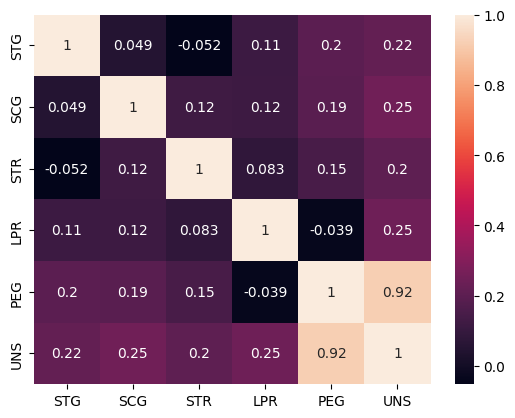

In [26]:
sns.heatmap(df.corr(numeric_only= True) , annot = True);

*Ödev LDA ile 2 boyutlu hale getir bu datayı

In [27]:
# Pass

# Modelling

X and y Split

In [28]:
X = df.drop('UNS' , axis = 1)
y = df['UNS']

### Train | Test Split

In [31]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 53)

In [34]:
print(f"X'in shape'i {X.shape}")
print(f"X_train'in shape'i {X_train.shape}")
print(f"X_test'in shape'i {X_test.shape}")

X'in shape'i (403, 5)
X_train'in shape'i (322, 5)
X_test'in shape'i (81, 5)


In [35]:
print(f"y'in shape'i {y.shape}")
print(f"y_train'in shape'i {y_train.shape}")
print(f"y_test'in shape'i {y_test.shape}")

y'in shape'i (403,)
y_train'in shape'i (322,)
y_test'in shape'i (81,)


In [37]:
y.value_counts()

1    129
2    122
3    102
0     50
Name: UNS, dtype: int64

In [36]:
y_train.value_counts()

1    108
2     96
3     79
0     39
Name: UNS, dtype: int64

## Model Time

### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',
                                  splitter = 'best',
                                  max_depth = 7,
                                  min_samples_split = 3,
                                  max_features = 5,
                                  random_state = 53
                                  )

In [40]:
dt_model.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=5,
                       min_samples_split=3, random_state=53)

In [41]:
dt_model_y_pred = dt_model.predict(X_test)

In [42]:
dt_model_y_pred

array([2, 1, 2, 2, 0, 3, 0, 1, 2, 1, 3, 0, 2, 3, 2, 1, 3, 1, 2, 0, 2, 3,
       2, 1, 2, 1, 3, 0, 3, 1, 3, 0, 1, 3, 1, 2, 2, 2, 1, 1, 2, 1, 0, 0,
       2, 2, 2, 3, 3, 1, 1, 0, 2, 3, 1, 3, 3, 3, 1, 2, 0, 1, 0, 2, 2, 1,
       1, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 2, 0, 1])

In [44]:
np.array(y_test)

array([2, 1, 2, 2, 1, 3, 0, 1, 2, 1, 3, 0, 2, 3, 2, 1, 3, 1, 2, 0, 2, 3,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 0, 1, 3, 1, 2, 2, 2, 1, 1, 2, 2, 0, 1,
       2, 2, 2, 3, 2, 1, 1, 0, 2, 3, 2, 3, 3, 3, 2, 2, 0, 1, 0, 2, 2, 1,
       1, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 2, 0, 1])

In [45]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [46]:
accuracy_score(y_test , dt_model_y_pred)

0.9012345679012346

In [48]:
print(classification_report(y_test , dt_model_y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       0.86      0.86      0.86        21
           2       0.96      0.85      0.90        26
           3       0.96      0.96      0.96        23

    accuracy                           0.90        81
   macro avg       0.89      0.91      0.90        81
weighted avg       0.91      0.90      0.90        81



In [49]:
confusion_matrix(y_test , dt_model_y_pred)

array([[11,  0,  0,  0],
       [ 3, 18,  0,  0],
       [ 0,  3, 22,  1],
       [ 0,  0,  1, 22]])

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',
                                  splitter = 'best',
                                  max_depth = 7,
                                  min_samples_split = 3,
                                  max_features = 5,
                                  random_state = 53
                                  )

In [52]:
cross_val_score(dt_model , X , y , cv= 5)

array([0.83950617, 0.9382716 , 0.9382716 , 0.8625    , 0.9125    ])

In [53]:
cross_val_score(dt_model , X , y , cv= 5).mean()

0.8982098765432097

### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf_model = RandomForestClassifier(n_estimators= 200,
                                  criterion = 'gini',
                                  max_depth = 5,
                                  min_samples_split = 5,
                                  max_features = 3,
                                  bootstrap = True,
                                  max_samples = 0.6
                                  )

In [56]:
rf_model.fit(X_train , y_train)

RandomForestClassifier(max_depth=5, max_features=3, max_samples=0.6,
                       min_samples_split=5, n_estimators=200)

In [57]:
rf_model_y_pred = rf_model.predict(X_test)
rf_model_y_pred

array([2, 1, 2, 2, 1, 3, 0, 1, 2, 1, 3, 0, 1, 3, 2, 1, 3, 1, 2, 0, 2, 3,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 0, 1, 3, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1,
       2, 2, 2, 3, 3, 1, 1, 0, 2, 3, 2, 3, 3, 3, 1, 2, 0, 1, 0, 2, 2, 1,
       1, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 2, 0, 1])

In [59]:
np.array(y_test)

array([2, 1, 2, 2, 1, 3, 0, 1, 2, 1, 3, 0, 2, 3, 2, 1, 3, 1, 2, 0, 2, 3,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 0, 1, 3, 1, 2, 2, 2, 1, 1, 2, 2, 0, 1,
       2, 2, 2, 3, 2, 1, 1, 0, 2, 3, 2, 3, 3, 3, 2, 2, 0, 1, 0, 2, 2, 1,
       1, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 2, 0, 1])

In [60]:
accuracy_score(y_test , rf_model_y_pred)

0.9506172839506173

In [61]:
print(classification_report(y_test , rf_model_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93        21
           2       1.00      0.85      0.92        26
           3       0.96      1.00      0.98        23

    accuracy                           0.95        81
   macro avg       0.96      0.96      0.96        81
weighted avg       0.96      0.95      0.95        81



In [62]:
confusion_matrix(y_test , rf_model_y_pred)

array([[11,  0,  0,  0],
       [ 0, 21,  0,  0],
       [ 0,  3, 22,  1],
       [ 0,  0,  0, 23]])

# Modelimizi Dışarıya Aktarma

In [63]:
import joblib

In [64]:
joblib.dump(rf_model , 'rf_model.joblib')

['rf_model.joblib']

In [65]:
loaded_model = joblib.load('rf_model.joblib')

In [67]:
loaded_model.predict(X_test)

array([2, 1, 2, 2, 1, 3, 0, 1, 2, 1, 3, 0, 1, 3, 2, 1, 3, 1, 2, 0, 2, 3,
       2, 1, 3, 1, 3, 1, 3, 1, 3, 0, 1, 3, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1,
       2, 2, 2, 3, 3, 1, 1, 0, 2, 3, 2, 3, 3, 3, 1, 2, 0, 1, 0, 2, 2, 1,
       1, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 2, 0, 1])

In [68]:
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,3
2,0.06,0.06,0.05,0.25,0.33,1
3,0.10,0.10,0.15,0.65,0.30,2
4,0.08,0.08,0.08,0.98,0.24,1


In [70]:
loaded_model.predict([[0.08 , 0.06 , 0.15 , 0.98 , 0.90]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([3])

In [ ]:
# Done